17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


C:\Users\Siddhant Gite\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 131s 802ms/step - accuracy: 0.7693 - loss: 0.4732 - val_accuracy: 0.8362 - val_loss: 0.3748
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 121s 773ms/step - accuracy: 0.8989 - loss: 0.2578 - val_accuracy: 0.8682 - val_loss: 0.3158
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 149s 951ms/step - accuracy: 0.9293 - loss: 0.1891 - val_accuracy: 0.8754 - val_loss: 0.3463
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.9513 - loss: 0.1355 - val_accuracy: 0.8730 - val_loss: 0.4091
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 156s 991ms/step - accuracy: 0.9595 - loss: 0.1146 - val_accuracy: 0.8250 - val_loss: 0.4421


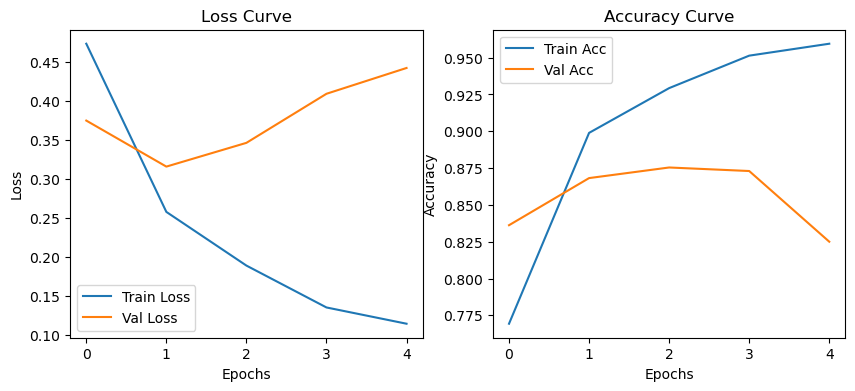

782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 118ms/step - accuracy: 0.8174 - loss: 0.4623

Test Accuracy: 0.8174
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step

Sample Predictions:

Review # 0
Actual: 0 | Predicted: 0
-----------------------------
Review # 1
Actual: 1 | Predicted: 1
-----------------------------
Review # 2
Actual: 1 | Predicted: 1
-----------------------------
Review # 3
Actual: 0 | Predicted: 0
-----------------------------
Review # 4
Actual: 1 | Predicted: 1
-----------------------------


C:\Users\Siddhant Gite\AppData\Local\Temp\ipykernel_6088\1426572748.py:67: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Actual:", y_test[i], "| Predicted:", int(pred[i]))


In [1]:
# IMDB Sentiment Classification using LSTM (Simple Code)

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 1. Load IMDB dataset
num_words = 10000
maxlen = 200

(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)

# 2. Pad sequences (make equal length)
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

# 3. Build LSTM Model
model = keras.Sequential([
    layers.Embedding(num_words, 128, input_length=maxlen),
    layers.LSTM(128),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# 4. Train Model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=128,
    verbose=1
)

# 5. Plot Accuracy & Loss
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Curve")
plt.xlabel("Epochs"); plt.ylabel("Accuracy")
plt.legend()

plt.show()

# 6. Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Accuracy: {test_acc:.4f}")

# 7. Predict and display sample results
pred = (model.predict(X_test[:5]) > 0.5).astype(int)

print("\nSample Predictions:\n")
for i in range(5):
    print("Review #", i)
    print("Actual:", y_test[i], "| Predicted:", int(pred[i]))
    print("-----------------------------")
